# CS 4661: Introduction to Data Science
## Jay Tandel


### Question: Handwriting Recognition using Machine Learning!

## A
Download the dataset “Digit” and its label from this link:  https://app.box.com/s/sogk96kukv6ayyyy6ym63a2nu3aozif7 (Links to an external site.)

Check out the dataset. It includes 1797 small images (8x8 pixels), each one includes a hand-written digit (0-9). You have to download the corresponding csv file that includes the labels of the images. The goal is to build a Machine Learning Algorithm that can recognize the hand-written digits!

Import the following two libraries to work with images:

import matplotlib.image as mpimg

import matplotlib.pyplot as plt

you can use:

mpimg.imread(file_name)   to load an image, and

plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')  to show an image.

Add   %matplotlib inline   at top of your code to make sure that the images will be shown inside the Jupyter explorer page.



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline 

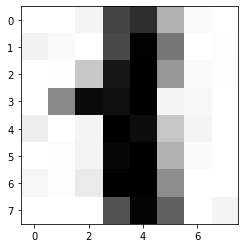

In [2]:

img = mpimg.imread('Digit/1.jpg')
plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest') 
plt.show()

In [3]:
dataset_size = 1797
digits = []
for i in range(dataset_size):
    digits.append(mpimg.imread('Digit/' + str(i) + '.jpg'))

In [4]:
df = pd.read_csv('label.csv')
df.head()

,name of the file,digit label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


# B
Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 8x8 image into an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with 64 feature columns.

In [5]:
#Title of each column of the feature matrix
columns = []
for i in range (0, 64):
    columns.append('Pixel ' + str(i))

#Creating the Feature Matrix
X = pd.DataFrame(columns=columns)

In [6]:
#Filling out the Feature Matrix with the Pixel Data from the "images" list
for i in range(dataset_size):
    fimg = digits[i].flatten()
    X.loc[i] = fimg

In [7]:
X.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 54,Pixel 55,Pixel 56,Pixel 57,Pixel 58,Pixel 59,Pixel 60,Pixel 61,Pixel 62,Pixel 63
0,0,2,88,217,158,21,0,0,16,0,...,4,0,4,3,87,228,182,0,9,2
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,0,0,172,251,157,0,12
2,0,0,5,59,240,199,2,0,5,0,...,92,0,0,11,0,54,173,255,138,0
3,6,0,108,255,213,13,10,0,2,131,...,168,1,0,0,118,217,226,159,0,3
4,0,6,0,34,160,7,7,0,5,0,...,7,0,0,0,2,42,250,51,0,4


In [8]:
y = df['digit label']
y.head()

0    0
1    1
2    2
3    3
4    4
Name: digit label, dtype: int64

# C
Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=2.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

# D
Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that you built in part (c). Use this command to import and define your classifier:

from   sklearn.ensemble    import    RandomForestClassifier

my_RandomForest =

RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

Use my_RandomForest.fit for training your random forest classifier and my_RandomForest.predict  for prediction. Test your Machine Learning Algorithm on testing set (from part(c)), and calculate and report the accuracy.

In [10]:
# Random Forest Classifier
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
# Training and Predicting using Random Forest
my_RandomForest.fit(X_train, y_train)
y_predict = my_RandomForest.predict(X_test)

# calculating accuracy score of random forest
rf_score = accuracy_score(y_test, y_predict)

# print random forest score
print("Accuracy with Random Forest: " + str(rf_score))

Accuracy with Random Forest: 0.9277777777777778


# E
Write some codes to find which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set. Then, use the following command to show the misclassified images:    plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest'

In [11]:
# find keys of misclassified images
y_test = np.asarray(y_test)
misclassified = np.where(y_test != y_predict)[0]
print(misclassified)

[  4  16  41  44  45  49  63  66 115 130 137 165 174]


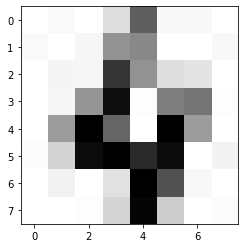

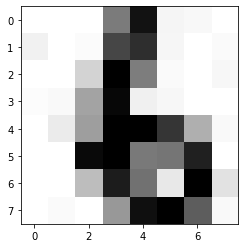

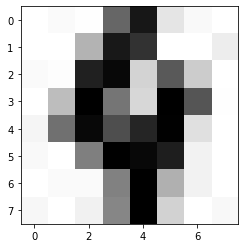

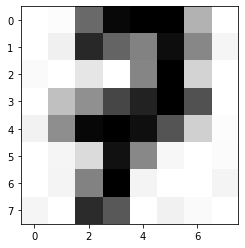

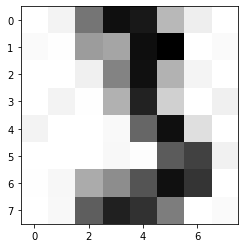

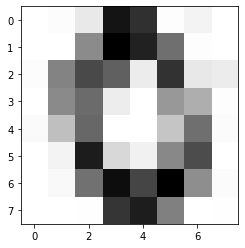

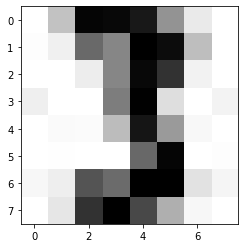

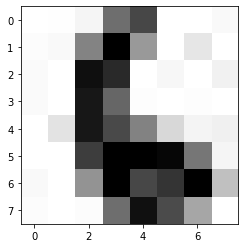

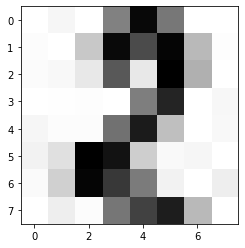

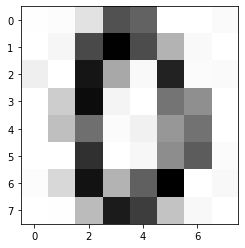

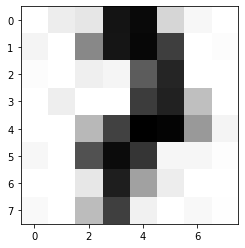

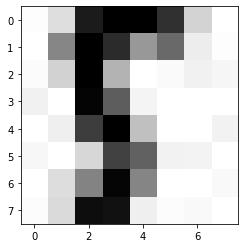

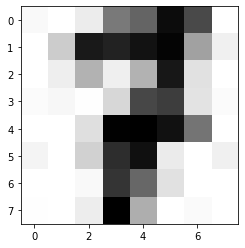

In [12]:
for x in misclassified:
    plt.figure()
    plt.imshow(digits[x], cmap=plt.cm.gray_r, interpolation='nearest')


# Answer Summary
## D
#### Accuracy with Random Forest: 0.9277777777777778